# Perceptron classification


## Data setup

First thing to do is to set the seed. The generate N points or each class. We put N with value of 250 and then define the probabilities for the two feature of X1 and for the two features fo X2.

In [23]:
import numpy as np

# set seed
np.random.seed(3049)

# samples
N = 250

# class 1
X1_1 = np.random.normal(loc=0.5, scale=1.5, size=N)
X1_2 = np.random.normal(loc=5.4, scale=0.5, size=N)

# class 2
X2_1 = np.random.poisson(lam=1.5, size=N)
X2_2 = np.random.exponential(scale=2, size=N)

# labels
Y1 = np.ones(N)
Y2 = - np.ones(N)


Prit the data using matplotlib

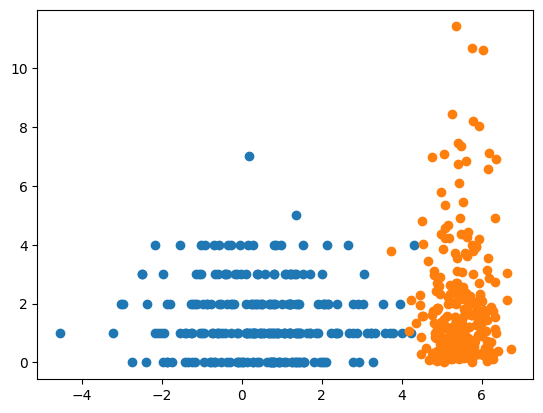

In [24]:
import matplotlib.pyplot as plt

# plot X1
plt.figure()
plt.scatter(X1_1, X2_1)


# plot X2
plt.scatter(X1_2, X2_2)

# display plots
plt.show()


Create a matrix of points X where each row is an object and each column is its feature. Remember to add the bias X0. Then create also the output vector Y.

In [25]:
# create the bias vector
X0 = np.ones(2 * N)

# create the data matrix X1 for set 1
X1 = np.concatenate((X1_1, X2_1))

# create the data matrix X2 for set 2
X2 = np.concatenate((X1_2, X2_2))

# create the data matrix X
X = np.stack((X0, X1, X2), axis=1)

# create label vector Y
Y = np.concatenate((Y1, Y2))

## Training part

Step to train:
1. Initialize vector of parameters w with a normal distribution and mean zero
1. Learning rate to 1e-4
1. Mini batch of size 20
1. Max epochs to 500
1. Vector epoch error


In [26]:
# weight vector
w = np.random.normal(X.shape[0])

# define epochs
max_epochs = 500
epoch = 0

# define error vector per epoch
errors_epoch = []

# learning rate
eta = 1e-4

batch_size = 20


# start training
while True:

    perceptron_output = np.sign(np.dot(X, w))

    errors_epoch[epoch] = np.sum(Y * perceptron_output < 0)

    # permutation
    rand_perm = np.random.permutation(range(Y.shape[0]))
    X = X[rand_perm, :]
    Y = Y[rand_perm]

    # mini batch learning
    for j in range(0, Y.shape[0], step=batch_size):
        X_batch = X[j : (j + batch_size), :]
        Y_batch = Y[j : (j + batch_size)]

        # compute errors
        errors = Y_batch - np.dot(X_batch, w)

        # update rule
        w = w + eta * np.dot(np.transpose(X_batch), errors)

    epoch += 1
    if max_epochs == epoch:
        break

# put it here for last iteration
errors_epoch[epoch] = np.sum(Y * perceptron_output < 0)






ValueError: operands could not be broadcast together with shapes (500,) (500,3) 